## Sports Data Ananlysis

This notebook analyses ODI data for 2018 and answers various questions to get insights from the data provided.

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#Read the data file

df = pd.read_excel(r"ODI_Cricket_Matches.xlsx")
df.head()

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard
0,New Zealand,Pakistan,New Zealand,61 runs,Wellington,2018-01-06,ODI # 3946
1,New Zealand,Pakistan,New Zealand,8 wickets,Nelson,2018-01-09,ODI # 3947
2,U.A.E.,Ireland,Ireland,4 wickets,ICCA Dubai,2018-01-11,ODI # 3948
3,New Zealand,Pakistan,New Zealand,183 runs,Dunedin,2018-01-13,ODI # 3949
4,U.A.E.,Ireland,Ireland,67 runs,ICCA Dubai,2018-01-13,ODI # 3950


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 7 columns):
Team 1        128 non-null object
Team 2        128 non-null object
Winner        128 non-null object
Margin        123 non-null object
Ground        128 non-null object
Match Date    128 non-null datetime64[ns]
Scorecard     128 non-null object
dtypes: datetime64[ns](1), object(6)
memory usage: 7.1+ KB


In [4]:
df.shape

(128, 7)

In [5]:
df.isnull().sum()

Team 1        0
Team 2        0
Winner        0
Margin        5
Ground        0
Match Date    0
Scorecard     0
dtype: int64

In [6]:
df[df['Margin'].isna()]

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard
50,Zimbabwe,Scotland,tied,NaN,Bulawayo,2018-03-12,ODI # 3996
100,Afghanistan,India,tied,NaN,Dubai (DSC),2018-09-25,ODI # 4046
106,Sri Lanka,England,no result,NaN,Dambulla,2018-10-10,ODI # 4052
113,India,West Indies,tied,NaN,Visakhapatnam,2018-10-24,ODI # 4059
124,New Zealand,Pakistan,no result,NaN,Dubai (DSC),2018-11-11,ODI # 4070


#### Check for duplicate values and drop if any

In [7]:
# find total duplicate entries and drop them if any
print(f'total duplicate rows: {df.duplicated().sum()}')

total duplicate rows: 0


#### Transform the Margin Column into two columns one for runs and another one for wicket

In [8]:
#won by wickets ,the winner played second
#won by run, the winner played first

import re
df['win_by_runs'] = df['Margin'].apply(lambda x : re.sub("\D", "", x) if 'runs' in str(x) else 0)
df['win_by_wickets'] = df['Margin'].apply(lambda x : re.sub("\D", "", x) if 'wickets' in str(x) else 0)

In [31]:
df['win_by_runs'] = df['win_by_runs'].astype(float)
df['win_by_wickets'] = df['win_by_wickets'].astype(float)

In [9]:
df.head()

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard,win_by_runs,win_by_wickets
0,New Zealand,Pakistan,New Zealand,61 runs,Wellington,2018-01-06,ODI # 3946,61,0
1,New Zealand,Pakistan,New Zealand,8 wickets,Nelson,2018-01-09,ODI # 3947,0,8
2,U.A.E.,Ireland,Ireland,4 wickets,ICCA Dubai,2018-01-11,ODI # 3948,0,4
3,New Zealand,Pakistan,New Zealand,183 runs,Dunedin,2018-01-13,ODI # 3949,183,0
4,U.A.E.,Ireland,Ireland,67 runs,ICCA Dubai,2018-01-13,ODI # 3950,67,0


#### Which country played the most ODI's in 2018

In [10]:
df['year'] = df['Match Date'].dt.year

In [11]:
team_1_countries = df['Team 1'].value_counts()

In [12]:
team_2_countries = df['Team 2'].value_counts()

In [13]:
df_countries = pd.concat([team_1_countries, team_2_countries]).rename_axis('country').reset_index(name='counts')
df_countries.groupby('country').sum().sort_values(by='counts',ascending=False)

,counts
country,
Zimbabwe,26
England,24
India,20
Afghanistan,20
Bangladesh,20
Pakistan,18
West Indies,18
South Africa,17
Sri Lanka,17


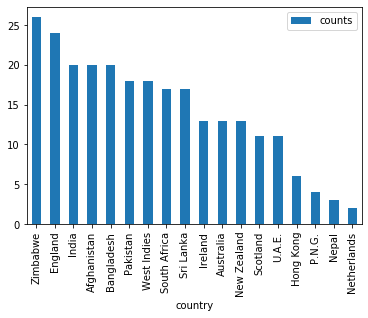

In [14]:
df_countries.groupby('country').sum().sort_values(by='counts',ascending=False).plot(kind='bar')

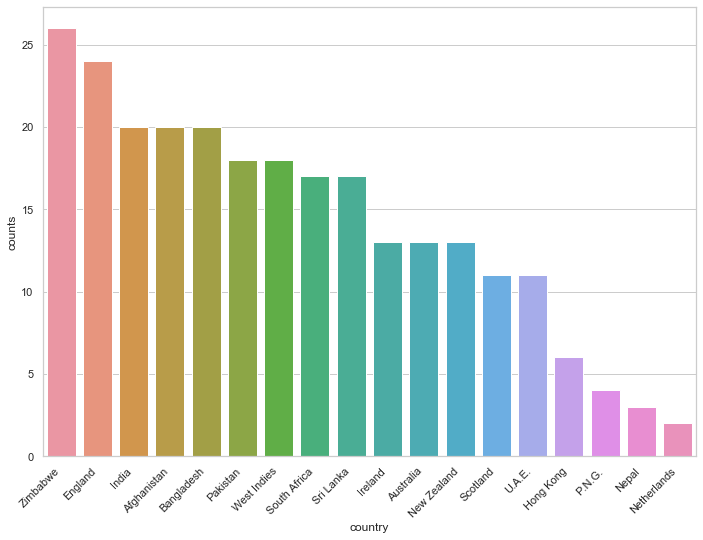

In [15]:
#sns.set(style="whitegrid")
sns.set(style="whitegrid", rc={'figure.figsize':(11.7,8.27)})
df_coun_top = df_countries.groupby('country').sum().sort_values(by='counts',ascending=False).reset_index()
ax = sns.barplot(x="country", y="counts", data=df_coun_top)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

#### Top 3 countries who won the most ODIs

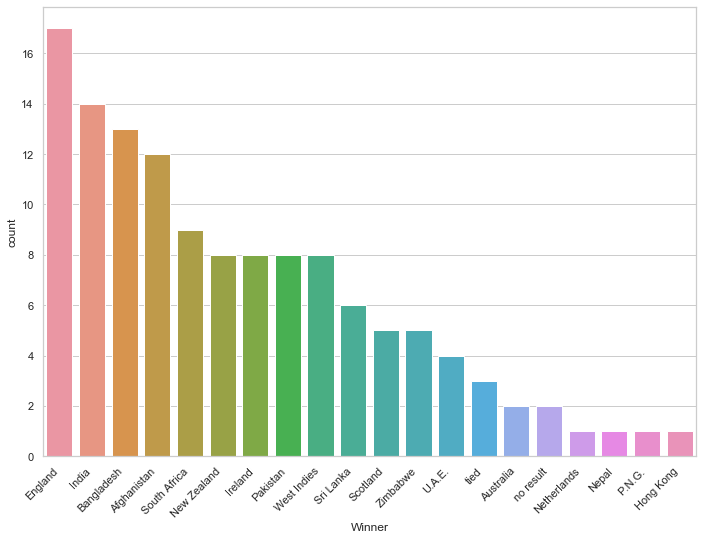

In [16]:
ax = sns.countplot(x='Winner',data=df, order=df['Winner'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');
#df['Winner'].value_counts()

#### Based on the ground , Map the country

In [17]:
df['Ground'].value_counts()

Harare                16
Bulawayo              12
Dhaka                 10
Dubai (DSC)            9
Abu Dhabi              7
ICCA Dubai             6
Sharjah                5
Pallekele              4
Dambulla               4
Wellington             3
Belfast                3
Perth                  2
Amstelveen             2
Dunedin                2
Adelaide               2
Colombo (RPS)          2
Hamilton               2
Providence             2
Centurion              2
Nottingham             2
Chattogram             2
Mount Maunganui        1
Edinburgh              1
The Oval               1
Leeds                  1
Kuala Lumpur           1
Sylhet                 1
Kimberley              1
Christchurch           1
Pune                   1
Cardiff                1
Visakhapatnam          1
Basseterre             1
Guwahati               1
Paarl                  1
Chester-le-Street      1
Hobart                 1
Sydney                 1
Cape Town              1
Lord's                 1


In [18]:
country_ground = { 'Harare':'Zimbabwe',
  'Bulawayo':'Zimbabwe',
  'Dhaka':'Bangladesh',
  'Dubai (DSC)' : 'U.A.E.',
  'Abu Dhabi' : 'U.A.E.',
  'ICCA Dubai' : 'U.A.E.',
  'Sharjah' : 'U.A.E.',
  'Thiruvananthapuram' : 'India',
  'Visakhapatnam' : ' India',
  'Pune':'India',
  'Guwahati' : 'India',
  'Mumbai (BS)': 'India',
  'Wellington':'New Zealand',
  'Sydney' : 'Australia',
  'Melbourne':'Australia',
  'Perth':'Australia',
  'Belfast': 'Ireland',
  'Chattogram':'Bangladesh',
  'Adelaide':'Australia',
  'Centurion':'South Africa',
  'Amstelveen':'Netherlands',
  'Nottingham': ' England',
  'Colombo (RPS)': 'Sri Lanka',
  'Hamilton': 'New Zealand',
  'Dunedin': 'New Zealand',
  'Providence':'West Indies',
  'Paarl':'South Africa',
  'Hobart' : 'Australia',
  'Johannesburg':'South Africa',
  'Cape Town':'South Africa',
  'Nelson' : 'New Zealand',
  'Durban':'South Africa',
  'Leeds' : 'England',
  'Basseterre':'West Indies',
  'Sylhet' : 'Bangladesh',
  'Brisbane' : 'Australia',
  'Bloemfontein' : 'South Africa',
  'Christchurch' : 'New Zealand',
  'Edinburgh' : 'Scotland',
  'Port Elizabeth':'South Africa',
  'The Oval' : 'England',
  'Chester-le-Street': 'England',
  'Manchester': 'England',
  "Lord's" : 'England',
  'Kuala Lumpur' : 'Malaysia',
  'Cardiff' : 'England',
  'Mount Maunganui' :'New Zealand',
  'Dambulla':'Sri Lanka',
  'Pallekele':'Sri Lanka',
  'Kimberley':'South Africa'
}

In [19]:
df['country_played'] = df['Ground'].map(country_ground)
df.head()

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard,win_by_runs,win_by_wickets,year,country_played
0,New Zealand,Pakistan,New Zealand,61 runs,Wellington,2018-01-06,ODI # 3946,61,0,2018,New Zealand
1,New Zealand,Pakistan,New Zealand,8 wickets,Nelson,2018-01-09,ODI # 3947,0,8,2018,New Zealand
2,U.A.E.,Ireland,Ireland,4 wickets,ICCA Dubai,2018-01-11,ODI # 3948,0,4,2018,U.A.E.
3,New Zealand,Pakistan,New Zealand,183 runs,Dunedin,2018-01-13,ODI # 3949,183,0,2018,New Zealand
4,U.A.E.,Ireland,Ireland,67 runs,ICCA Dubai,2018-01-13,ODI # 3950,67,0,2018,U.A.E.


In [20]:
df['country_played'].isnull().sum()

0

#### Which country placed most matched in home ground

In [21]:
df_home_gnd = df[['Team 1','Team 2','country_played']].copy()

In [22]:
df_1 = df_home_gnd.copy()
df_1['Flag'] = np.where(df['Team 1'] == df['country_played'], 1, 0)
df_1.drop(['Team 2'],inplace=True,axis=1)
df_1.rename(columns={'Team 1' : 'Team'},inplace=True)
df_1.head(10)

,Team,country_played,Flag
0,New Zealand,New Zealand,1
1,New Zealand,New Zealand,1
2,U.A.E.,U.A.E.,1
3,New Zealand,New Zealand,1
4,U.A.E.,U.A.E.,1
5,Australia,Australia,1
6,Bangladesh,Bangladesh,1
7,New Zealand,New Zealand,1
8,Ireland,U.A.E.,0
9,Sri Lanka,Bangladesh,0


In [23]:
df_2 = df_home_gnd.copy()
df_2['Flag'] = np.where(df['Team 2'] == df['country_played'], 1, 0)
df_2.drop(['Team 1'],inplace=True,axis=1)
df_2.rename(columns={'Team 2' : 'Team'},inplace=True)
df_2.head(10)

,Team,country_played,Flag
0,Pakistan,New Zealand,0
1,Pakistan,New Zealand,0
2,Ireland,U.A.E.,0
3,Pakistan,New Zealand,0
4,Ireland,U.A.E.,0
5,England,Australia,0
6,Zimbabwe,Bangladesh,0
7,Pakistan,New Zealand,0
8,Scotland,U.A.E.,0
9,Zimbabwe,Bangladesh,0


In [24]:
df_home = pd.concat([df_1, df_2])
df_home.groupby('Team')['Flag'].sum().rename_axis('Team').reset_index(name='counts').sort_values(by='counts',ascending=False)

,Team,counts
17,Zimbabwe,11
2,Bangladesh,11
14,Sri Lanka,10
9,New Zealand,10
13,South Africa,9
1,Australia,8
3,England,6
5,India,4
15,U.A.E.,4
6,Ireland,3


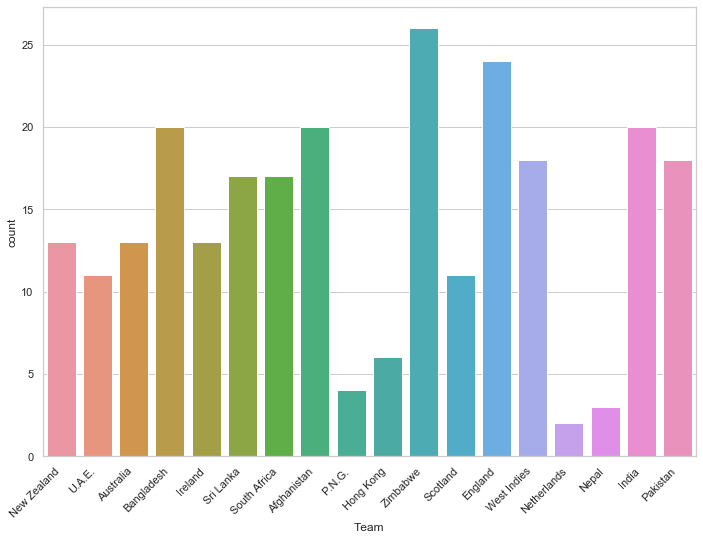

In [25]:
ax = sns.countplot(x='Team',data=df_home)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

#### Which Team had won by (closest margin) minimum runs

In [47]:
df.iloc[df[df['win_by_runs'].ge(1)].win_by_runs.idxmin()]

Team 1                       Zimbabwe
Team 2                    Afghanistan
Winner                       Zimbabwe
Margin                         2 runs
Ground                       Bulawayo
Match Date        2018-03-06 00:00:00
Scorecard                  ODI # 3988
win_by_runs                         2
win_by_wickets                      0
year                             2018
country_played               Zimbabwe
Name: 42, dtype: object

#### Which Team had won by maximum runs?

In [48]:
df.iloc[df['win_by_runs'].idxmax()]


Team 1                       Zimbabwe
Team 2                       Pakistan
Winner                       Pakistan
Margin                       244 runs
Ground                       Bulawayo
Match Date        2018-07-20 00:00:00
Scorecard                  ODI # 4020
win_by_runs                       244
win_by_wickets                      0
year                             2018
country_played               Zimbabwe
Name: 74, dtype: object

#### Which Team had won by maximum wickets?

In [33]:
df.iloc[df['win_by_wickets'].idxmax()]

Team 1                     Bangladesh
Team 2                      Sri Lanka
Winner                      Sri Lanka
Margin                     10 wickets
Ground                          Dhaka
Match Date        2018-01-25 00:00:00
Scorecard                  ODI # 3965
win_by_runs                         0
win_by_wickets                     10
year                             2018
country_played             Bangladesh
Name: 19, dtype: object

#### Which Team had won by minimum wickets?

In [50]:
df.iloc[df[df['win_by_wickets'].ge(1)].win_by_wickets.idxmin()]


Team 1                      Australia
Team 2                        England
Winner                      Australia
Margin                      3 wickets
Ground                       Adelaide
Match Date        2018-01-26 00:00:00
Scorecard                  ODI # 3966
win_by_runs                         0
win_by_wickets                      3
year                             2018
country_played              Australia
Name: 20, dtype: object

In [52]:
df[df['win_by_runs']>0].groupby(['Winner'])['win_by_runs'].apply(np.median).sort_values(ascending = False)

Winner
Pakistan        201.0
Afghanistan     136.0
Sri Lanka       128.5
India            98.5
Zimbabwe         89.0
South Africa     78.0
P.N.G.           58.0
U.A.E.           56.0
Netherlands      55.0
New Zealand      54.0
Ireland          46.0
West Indies      43.0
Bangladesh       42.5
Scotland         31.0
Hong Kong        30.0
England          24.5
Australia         7.0
Name: win_by_runs, dtype: float64

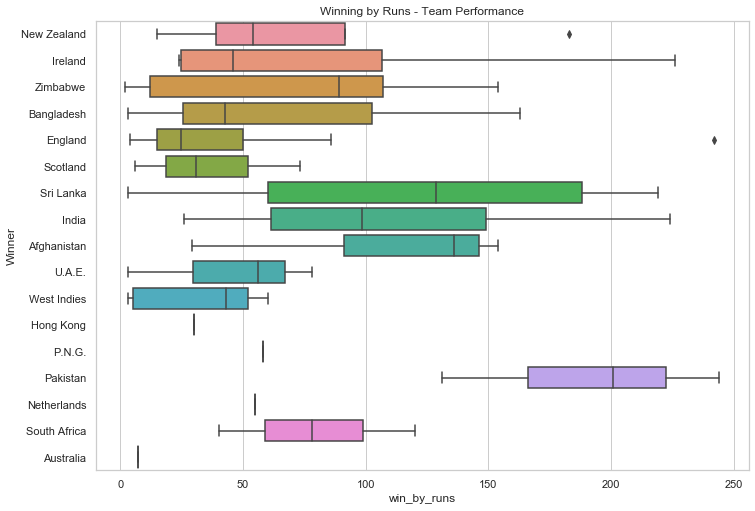

In [54]:
fig, ax = plt.subplots()
ax.set_title("Winning by Runs - Team Performance")
sns.boxplot(y = 'Winner', x = 'win_by_runs', data=df[df['win_by_runs']>0], orient = 'h'); #palette="Blues");
plt.show()

In [61]:
df[df['win_by_wickets']>0].groupby(['Winner'])['win_by_wickets']

In [56]:
df[df['win_by_wickets']>0].groupby(['Winner'])['win_by_wickets'].apply(np.median).sort_values(ascending = False)

Winner
Pakistan        8.0
India           8.0
Sri Lanka       7.5
Bangladesh      7.0
England         6.0
Afghanistan     6.0
Scotland        5.5
South Africa    5.0
New Zealand     5.0
West Indies     4.0
U.A.E.          4.0
Ireland         4.0
Australia       3.0
Name: win_by_wickets, dtype: float64

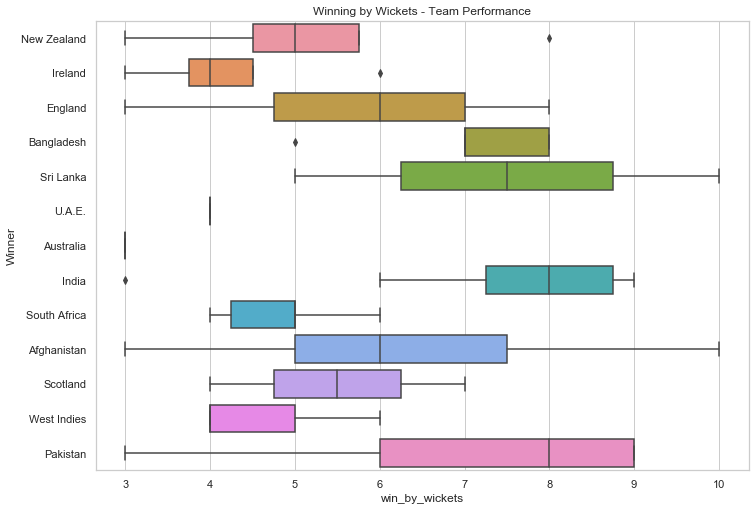

In [60]:
fig, ax = plt.subplots()
ax.set_title("Winning by Wickets - Team Performance")
sns.boxplot(y = 'Winner', x = 'win_by_wickets', data=df[df['win_by_wickets']>0], orient = 'h'); 
plt.show()

#### What are the top 3 wins by Runs (country who played second)

In [72]:
df[df['win_by_runs'].gt(0)].sort_values(by=['win_by_runs'],ascending=False)[['Winner','win_by_runs']].head(3)

,Winner,win_by_runs
74,Pakistan,244.0
65,England,242.0
49,Ireland,226.0


#### Month in which more ODI's were played

In [85]:
df['month']= df['Match Date'].dt.month
df['month'].value_counts()

3     26
1     23
10    14
9     14
2     13
7     12
8     10
11     7
6      6
12     3
Name: month, dtype: int64

#### How many cricket matcheswere played every month

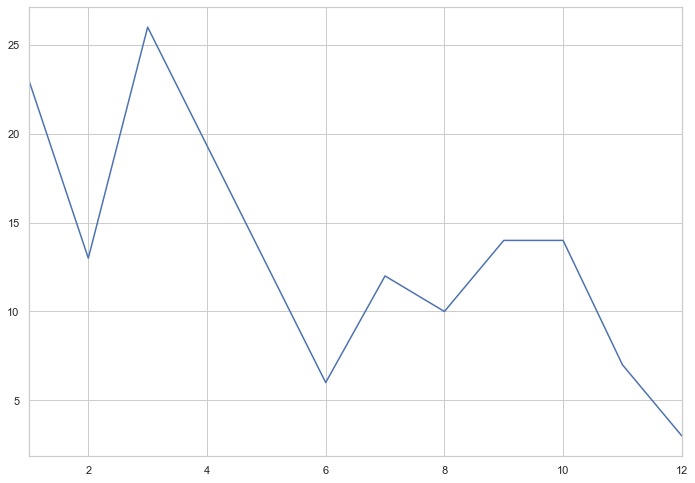

In [84]:
df['month']= df['Match Date'].dt.month
df['month'].value_counts().sort_index().plot()

#### On which ground most games were played

In [92]:
df['Ground'].value_counts()

df_top_ground = df.groupby('Ground')['country_played'].count().rename_axis('Ground').reset_index(name='counts').sort_values(by='counts',ascending=False)
df_top_ground['country'] = df_top_ground['Ground'].map(country_ground)
df_top_ground.head()

,Ground,counts,country
23,Harare,16,Zimbabwe
7,Bulawayo,12,Zimbabwe
16,Dhaka,10,Bangladesh
17,Dubai (DSC),9,U.A.E.
0,Abu Dhabi,7,U.A.E.


#### Did India win mostly by chasing or playing first

In [95]:
len(df[df['Winner'] == 'India'])

14

In [103]:
df[df['Winner'] == 'India']

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard,win_by_runs,win_by_wickets,year,country_played,month
23,South Africa,India,India,6 wickets,Durban,2018-02-01,ODI # 3969,0.0,6.0,2018,South Africa,2
24,South Africa,India,India,9 wickets,Centurion,2018-02-04,ODI # 3970,0.0,9.0,2018,South Africa,2
25,South Africa,India,India,124 runs,Cape Town,2018-02-07,ODI # 3971,124.0,0.0,2018,South Africa,2
30,South Africa,India,India,73 runs,Port Elizabeth,2018-02-13,ODI # 3976,73.0,0.0,2018,South Africa,2
32,South Africa,India,India,8 wickets,Centurion,2018-02-16,ODI # 3978,0.0,8.0,2018,South Africa,2
68,England,India,India,8 wickets,Nottingham,2018-07-12,ODI # 4014,0.0,8.0,2018,England,7
93,Hong Kong,India,India,26 runs,Dubai (DSC),2018-09-18,ODI # 4039,26.0,0.0,2018,U.A.E.,9
94,India,Pakistan,India,8 wickets,Dubai (DSC),2018-09-19,ODI # 4040,0.0,8.0,2018,U.A.E.,9
96,Bangladesh,India,India,7 wickets,Dubai (DSC),2018-09-21,ODI # 4042,0.0,7.0,2018,U.A.E.,9
98,India,Pakistan,India,9 wickets,Dubai (DSC),2018-09-23,ODI # 4044,0.0,9.0,2018,U.A.E.,9


In [105]:
df[df['Winner'] == 'India']['win_by_runs'].gt(0).value_counts()

False    10
True      4
Name: win_by_runs, dtype: int64

India mostly won by chasing

#### Team which toured most foreign country

In [114]:
df_team1 = df[['Team 1', 'country_played']].copy()
df_team2 = df[['Team 2','country_played']].copy()
df_team1.rename(columns={"Team 1": "Team"},inplace=True)
df_team2.rename(columns={"Team 2": "Team"},inplace=True)

In [130]:
df_team = pd.concat([df_team1,df_team2],axis=0)
df_team['inhouse'] = np.where(df_team['Team'] == df_team['country_played'],1,0)

In [131]:
df_team.groupby(['Team'])['inhouse'].sum().sort_values(ascending=False)

Team
Zimbabwe        11
Bangladesh      11
Sri Lanka       10
New Zealand     10
South Africa     9
Australia        8
England          6
U.A.E.           4
India            4
Ireland          3
West Indies      3
Netherlands      2
Scotland         1
Nepal            0
Hong Kong        0
P.N.G.           0
Pakistan         0
Afghanistan      0
Name: inhouse, dtype: int32

Zimbabwe and Bangladesh have played most inhouse matches

In [137]:
df_team[df_team.inhouse == 0].groupby('Team')['inhouse'].count().sort_values(ascending=False)

Team
Afghanistan     20
Pakistan        18
England         18
India           16
West Indies     15
Zimbabwe        15
Scotland        10
Ireland         10
Bangladesh       9
South Africa     8
Sri Lanka        7
U.A.E.           7
Hong Kong        6
Australia        5
P.N.G.           4
Nepal            3
New Zealand      3
Name: inhouse, dtype: int64

Afganistan team have toured the most

#### Team which lost most of the matches, lost the matches by chasing or playing first.

In [106]:
df['lost'] = np.where(df['Team 1'] == df['Winner'], df['Team 2'], df['Team 1'])
df['lost'] = np.where(df['Winner'] == 'tied', 'tied', df['lost'])
df['lost'] = np.where(df['Winner'] == 'no result', 'no result', df['lost'])

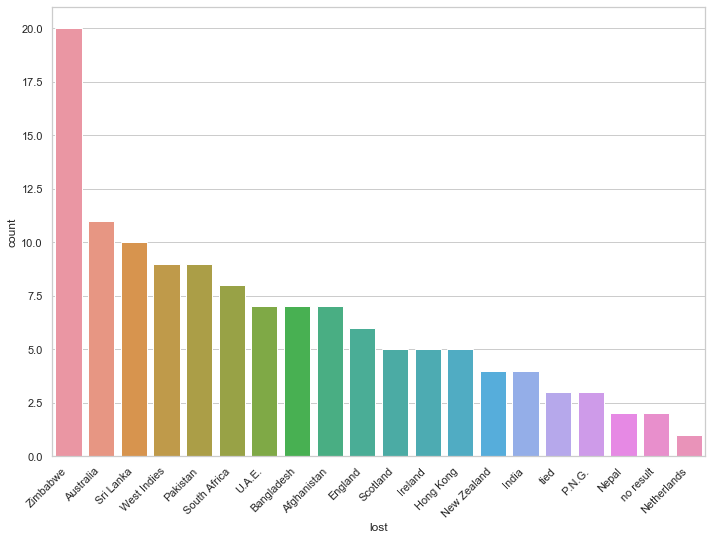

In [109]:
ax = sns.countplot(x='lost',data=df, order=df['lost'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

In [110]:
df[df['lost'] == 'Zimbabwe']['win_by_runs'].gt(0).value_counts()

False    11
True      9
Name: win_by_runs, dtype: int64

Zimbabwe lost most of the matches and they lost mostly by chasing

#### How was the performance of Sri Lanka

#how many matches they played compared to others, how many in house, how many outside the country
#winning performance in house
#winning performance outside

#whether they played well during 1st , second or 3rd season
#trend of matches played over months

In [174]:
#what was the winning percentage
print("Winning percentage for Srilanka - ",len(df[df.Winner=='Sri Lanka'])/df.shape[0]*100)


#what was the loosing percentage
print("Loosing percentage for Srilanka - ",len(df[df.lost=='Sri Lanka'])/df.shape[0]*100)


#how many matches they played compared to others, how many in house, how many outside the country
df_countries.groupby('country').filter(lambda x: (x["country"] == "Sri Lanka").any())

Winning percentage for Srilanka -  4.6875
Loosing percentage for Srilanka -  7.8125


,country,counts
3,Sri Lanka,12
26,Sri Lanka,5
